<a href="https://colab.research.google.com/github/jnsbrdbr/Programming-Exercise_andrewNG/blob/master/Programming%20Exercise%202%20-%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data1.txt

data = pd.read_csv('ex2data1.txt',header=None)

--2022-07-23 09:58:27--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt’

ex2data1.txt        100%[===================>]   3.69K  --.-KB/s    in 0s      

2022-07-23 09:58:27 (45.6 MB/s) - ‘ex2data1.txt’ saved [3775/3775]



In [3]:
data

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
data.columns=['exam_score_1', 'exam_score_2', 'label']

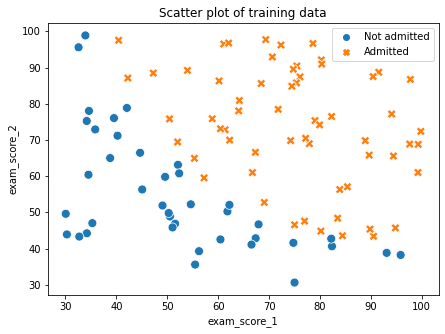

In [5]:
plt.figure(figsize=(7,5))
ax=sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=data, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show(ax)

In [6]:
def sigmoid(z):
  z=np.array(z)
  return 1 / (1+np.exp(-z))

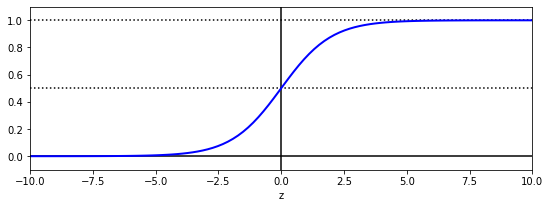

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [8]:
m = data.shape[0]
X = np.hstack((np.ones((m,1)),data[['exam_score_1', 'exam_score_2']].values))
y = np.array(data.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [9]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

In [10]:
m = data.shape[0]
X = np.hstack((np.ones((m,1)),data[['exam_score_1', 'exam_score_2']].values))
y = np.array(data.label.values).reshape(-1,1)
ini_theta = np.zeros(shape=(X.shape[1]))

In [11]:
cost, grad = cost_function(ini_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [12]:
test_theta = np.array([-24, 0.2, 0.2])
[cost, grad] = cost_function(test_theta, X, y)

print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad.T)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at test theta: [[0.21833019]]
Expected cost (approx): 0.218
Gradient at test theta:
[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647


1.2.3 Learning Parameters using an optimization solver

"Conjugate gradient", "BFGS", and "L-BFGS" are more sophisticated, faster ways to optimize @ that can be used instead of gradient descent.

In [13]:
import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [14]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

In [15]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: [[0.2034977]]
Expected cost (approx): 0.203
theta:
 [[-25.16131857]
 [  0.20623159]
 [  0.20147149]]
Expected theta (approx):
 -25.161
 0.206
 0.201


[ 26.57037068 103.31630956]


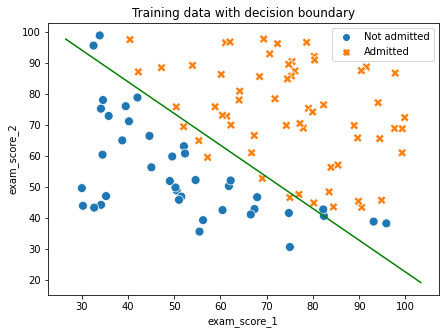

In [16]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=data, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], ['Not admitted', 'Admitted'])
plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
print(plot_x)#vicinity of x axis
plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))#equation of decision boundray
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)

In [17]:
prob = sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.7762906222622858
Expected value: 0.775 +/- 0.002


In [18]:
def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

In [19]:
X = np.hstack((np.ones((m,1)),data[['exam_score_1', 'exam_score_2']].values))

y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == data.label.values) * 100}'

'Train accuracy: 89.0'


1.2.5 Equivalent code using Scikit-Learn:

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=400)
log_reg.fit(data[['exam_score_1', 'exam_score_2']].values,data.label.values)

LogisticRegression(max_iter=400, solver='newton-cg')

In [21]:
log_reg.intercept_, log_reg.coef_

(array([-25.05200379]), array([[0.2053533 , 0.20058239]]))

In [22]:
log_reg.score(data[['exam_score_1', 'exam_score_2']].values,data.label.values)

0.89


2. Regularized Logistic Regression

In [23]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data2.txt
data_LR=pd.read_csv('ex2data2.txt',header=None)

--2022-07-23 09:58:29--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2233 (2.2K) [text/plain]
Saving to: ‘ex2data2.txt’

ex2data2.txt        100%[===================>]   2.18K  --.-KB/s    in 0s      

2022-07-23 09:58:29 (36.6 MB/s) - ‘ex2data2.txt’ saved [2233/2233]



In [24]:
data_LR.columns = ['test_1', 'test_2', 'label']

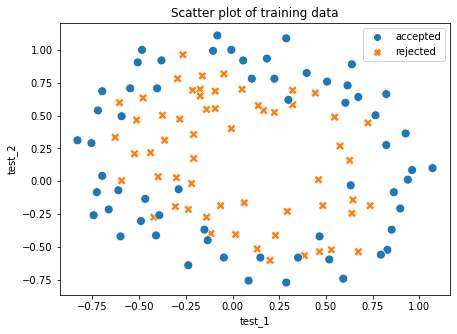

In [25]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='test_1', y='test_2', hue='label', data=data_LR, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], ['accepted', 'rejected'])
plt.title('Scatter plot of training data')
plt.show(ax)

In [26]:
def map_feature(X1, X2, degree):
    X1 = np.array(X1).reshape(-1,1)
    X2 = np.array(X2).reshape(-1,1)
    
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            p = (X1**(i-j)) * (X2**j)
            out = np.append(out, p, axis=1)
    return out

In [27]:
X_p = map_feature(data_LR.test_1.values, data_LR.test_2.values, 6)
X_p.shape

(118, 28)

In [28]:
def cost_function_reg(theta, X, y, lambda_reg):
    m = y.shape[0]
    theta = theta[:, np.newaxis] 
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h))) + (lambda_reg/(2*m)) * np.sum(theta[1:]**2)

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X) + ((lambda_reg/m) * theta.T)
    grad[0, 0] = (1/m) * diff_hy.T.dot(X[:, 0])

    return J, grad

In [29]:
import scipy.optimize as opt
def optimize_theta_reg(X, y, initial_theta, lambda_reg):
    opt_results = opt.minimize(cost_function_reg, initial_theta, args=(X, y, lambda_reg), method='TNC', jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [30]:
m = data_LR.shape[0]
X = X_p
y = np.array(data_LR.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [31]:
lambda_reg = 1
cost, grad = cost_function_reg(initial_theta, X, y, lambda_reg)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - top 5:')
print(grad.T[:5])
print('Expected gradients top 5(approx):\n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - top 5:
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]
Expected gradients top 5(approx):
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [32]:
lambda_reg = 10
initial_theta = np.ones(shape=(X.shape[1]))
cost, grad = cost_function_reg(initial_theta, X, y, lambda_reg)
print('Cost at initial theta:', cost)
print('Expected cost (approx): 3.16')
print('Gradient at theta - top 5:')
print(grad.T[:5])
print('Expected gradients top 5(approx):\n 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922')

Cost at initial theta: [[3.16450933]]
Expected cost (approx): 3.16
Gradient at theta - top 5:
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]
Expected gradients top 5(approx):
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



2.4 Plotting the Decision Boundary

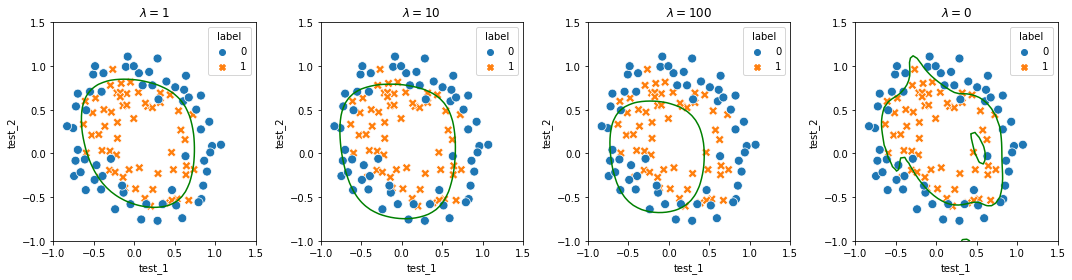

In [34]:
lambda_reg = [1, 10, 100, 0]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

for il, l in enumerate(lambda_reg):
    theta_opt, cost = optimize_theta_reg(X, y, initial_theta, l)
    z = np.zeros((u.shape[0], v.shape[0]))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = map_feature(u[i], v[j], 6).dot(theta_opt)
    
    sns.scatterplot(x='test_1', y='test_2', hue='label', data=data_LR, style='label', s=80, ax=axs[il])
    
    axs[il].contour(u, v, z.T, levels=[0], colors='green')
    axs[il].set_title('$\lambda={}$'.format(l))
fig.tight_layout()
plt.show()

In [35]:
lambda_reg = 1
theta, cost = optimize_theta_reg(X, y, initial_theta, lambda_reg)
theta

array([ 1.27273509,  0.62525435,  1.18108521, -2.01994882, -0.91742555,
       -1.43167368,  0.12399628, -0.36552234, -0.35723208, -0.17514253,
       -1.4581339 , -0.05098852, -0.61553085, -0.27470069, -1.19280263,
       -0.24220871, -0.20601057, -0.04472766, -0.27777351, -0.29536755,
       -0.45637086, -1.04318579,  0.02776829, -0.29241701,  0.01556523,
       -0.32737793, -0.14388044, -0.92463148])

In [37]:
y_pred_prob = predict(X, theta)
f'Train accuracy: {np.mean(y_pred_prob == data_LR.label.values) * 100}'

'Train accuracy: 83.05084745762711'


2.6 Equivalent Code using Scikit-Learn:

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=400)
log_reg.fit(X[:,1:], data_LR.label.values)

LogisticRegression(max_iter=400, solver='newton-cg')

In [42]:
log_reg.intercept_, log_reg.coef_

(array([1.27273852]),
 array([[ 0.62527427,  1.18107953, -2.01995701, -0.91743361, -1.43166228,
          0.12400943, -0.36552879, -0.35723375, -0.1751281 , -1.45816817,
         -0.05099315, -0.61556795, -0.27470949, -1.19281161, -0.24218951,
         -0.20599958, -0.04473522, -0.27778736, -0.29537501, -0.45635027,
         -1.04321271,  0.02777197, -0.29243756,  0.0155633 , -0.32738395,
         -0.14388956, -0.92464266]]))

In [43]:
log_reg.score(X[:,1:], data_LR.label.values)

0.8305084745762712